Mémoire de Master 2 Humanités Numériques et Master 2 Sociologie d'Anne-Lou Pichet. 
"Être Lecteur sur le Réseau Instagram : 
Sociologie et humanités numériques, regards croisés sur la pratique de la lecture sur Instagram. "


Ce script fait parti des annexes  de mon mémoire de recherche," Être Lecteur sur le Réseau Instagram : 
Sociologie et humanités numériques, regards croisés sur la pratique de la lecture sur Instagram." réalisé dans le cadre du Master Humanités numériques et du Master Sociologie (Analyse des sociétés contemporaines) à l’Université Lumière Lyon 2, durant l’année universitaire 2024-2025.


Mon mémoire cherche à comprendre comment se structure et évolue l’engagement dans la pratique de la lecture sur Instagram de personnes animant des comptes Instagram parlant de livres et lectures. Pour cela, nous avons mené des entretiens sociologiques avec cette population, et avons analysé leurs posts Instagram, à l'aide d'indicateurs statistiques et de méthodes de clustering. 
Au sein de ce script Python, je réalise les clusterings sur les indicateurs statistiques construits précédemment. Ils sont réalisés sur deux populations : les enquêtés et des couples enquêté-période. 

# Bibliothèques

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
#!pip install fanalysis
from fanalysis.pca import PCA as fPCA
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.stats as stats
import re

In [ ]:
# Au besoin utiliser le google Drive. 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Clustering sur les enquêtés

### Ouverture des données et prétraitements de celles-ci.

In [3]:
df_EN = pd.read_excel('/content/drive/MyDrive/Clustering_Memoire/Clustering_Global.xlsx',index_col=0)
df_EN

# Nettoyer les espaces en trop dans l'index
df_EN.index = df_EN.index.str.strip().str.replace(r'\s+_', '_', regex=True)

df_EN.head()
#df_EN.shape
df_EN.columns
#df_EN.describe()

Index(['Période', 'Nombre_de_Posts', 'Nombre_Total_Hashtags',
       'Nombre_Total_Mentions', 'Plusieurs_Images', 'Personne',
       'PostProduction', 'Mots', 'N_Ecrit', 'N_Video', 'N_Audio',
       'Pourcentage_Posts_Contenant_Hashtags_Total',
       'Pourcentage_Posts_Contenant_Mentions_Total',
       'Longueur_Moyenne_Caracteres', 'Pourcentage_Posts_Avec_Annexes',
       'Intervalle_Moyen', 'Ecart_Type_Intervalle',
       'Pourcentage_Posts_Contenant_Mentions_Pairs',
       'Pourcentage_Posts_Contenant_Mentions_Auteurs',
       'Pourcentage_Posts_Contenant_Mentions_Maisons'],
      dtype='object')

In [4]:
df_EN.drop(columns=['Période','Nombre_de_Posts','Nombre_Total_Mentions', 'Nombre_Total_Hashtags'], inplace=True)
df_EN.head()

,Plusieurs_Images,Personne,PostProduction,Mots,N_Ecrit,N_Video,N_Audio,Pourcentage_Posts_Contenant_Hashtags_Total,Pourcentage_Posts_Contenant_Mentions_Total,Longueur_Moyenne_Caracteres,Pourcentage_Posts_Avec_Annexes,Intervalle_Moyen,Ecart_Type_Intervalle,Pourcentage_Posts_Contenant_Mentions_Pairs,Pourcentage_Posts_Contenant_Mentions_Auteurs,Pourcentage_Posts_Contenant_Mentions_Maisons
Nom_d_emprunt,,,,,,,,,,,,,,,,
Agathe,0.00,0.00,0.0,0.000,100.000,0.000,0.0,100.000000,0.000000,1157.500000,0.00,23.000000,0.000000,0.000000,0.000,0.000
Alice,0.00,0.00,0.0,0.000,100.000,20.000,0.0,100.000000,23.333333,1236.166667,0.00,7.259259,5.056083,16.666667,0.000,0.000
Aline,0.00,2.50,67.5,45.000,100.000,0.000,0.0,75.000000,85.000000,1061.975000,0.00,11.250000,15.385258,32.500000,52.500,77.500
Alya,100.00,0.00,100.0,100.000,100.000,0.000,0.0,66.666667,0.000000,675.000000,0.00,11.259259,17.537855,0.000000,0.000,0.000
Amélie,43.75,18.75,62.5,53.125,96.875,28.125,0.0,68.750000,84.375000,1627.625000,18.75,13.194444,0.708321,0.000000,59.375,34.375


Création de la matrice des variables centrées-réduites

In [5]:
Z_EN =df_EN
X_EN=pd.DataFrame(StandardScaler().fit_transform(Z_EN), index=Z_EN.index, columns=Z_EN.columns)
X_EN.shape
X_EN.head()

,Plusieurs_Images,Personne,PostProduction,Mots,N_Ecrit,N_Video,N_Audio,Pourcentage_Posts_Contenant_Hashtags_Total,Pourcentage_Posts_Contenant_Mentions_Total,Longueur_Moyenne_Caracteres,Pourcentage_Posts_Avec_Annexes,Intervalle_Moyen,Ecart_Type_Intervalle,Pourcentage_Posts_Contenant_Mentions_Pairs,Pourcentage_Posts_Contenant_Mentions_Auteurs,Pourcentage_Posts_Contenant_Mentions_Maisons
Nom_d_emprunt,,,,,,,,,,,,,,,,
Agathe,-0.975398,-0.626349,-0.936761,-0.886083,0.422806,-0.728814,-0.340613,0.809332,-1.585777,-0.433976,-0.577480,1.034753,-0.628593,-0.595264,-0.885053,-1.247990
Alice,-0.975398,-0.626349,-0.936761,-0.886083,0.422806,0.865280,-0.340613,0.809332,-0.843180,-0.260736,-0.577480,-0.481568,-0.305803,1.090474,-0.885053,-1.247990
Aline,-0.975398,-0.345091,0.958238,0.405065,0.422806,-0.728814,-0.340613,-0.619428,1.119400,-0.644342,-0.577480,-0.097136,0.353632,2.691925,1.355099,1.474660
Alya,2.191506,-0.626349,1.870644,1.983135,0.422806,-0.728814,-0.340613,-1.095682,-1.585777,-1.496543,-0.577480,-0.096244,0.491058,-0.595264,-0.885053,-1.247990
Amélie,0.410123,1.483081,0.817867,0.638189,-0.102492,1.512881,-0.340613,-0.976618,1.099509,0.601338,0.266447,0.090174,-0.583372,-0.595264,1.648452,-0.040363


## Réduction des dimensions avec une ANALYSE EN COMPOSANTE PRINCIPALES (ACP)

Etape 2 : Inertie et valeurs propres : 
[[3.77598220e+00 3.20005041e+00 2.00280277e+00 1.60621826e+00
  1.42151476e+00 1.21490647e+00 9.13446599e-01 5.71830210e-01
  5.25038538e-01 3.48648275e-01 1.31030264e-01 1.19794570e-01
  8.24168134e-02 6.09301237e-02 2.37744351e-02 1.61531770e-03]
 [2.35998887e+01 2.00003150e+01 1.25175173e+01 1.00388641e+01
  8.88446723e+00 7.59316542e+00 5.70904124e+00 3.57393881e+00
  3.28149086e+00 2.17905172e+00 8.18939151e-01 7.48716064e-01
  5.15105083e-01 3.80813273e-01 1.48590219e-01 1.00957356e-02]
 [2.35998887e+01 4.36002038e+01 5.61177211e+01 6.61565852e+01
  7.50410524e+01 8.26342178e+01 8.83432591e+01 9.19171979e+01
  9.51986888e+01 9.73777405e+01 9.81966796e+01 9.89453957e+01
  9.94605008e+01 9.98413140e+01 9.99899043e+01 1.00000000e+02]]


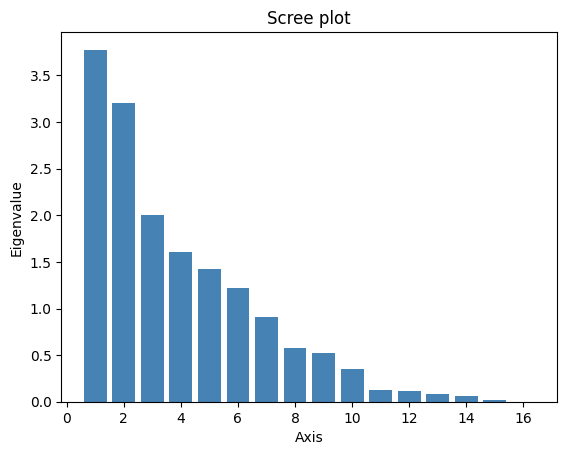

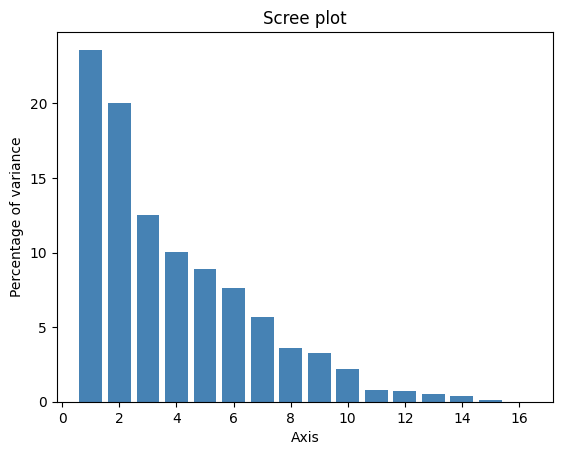

16.0
16
Etape 3 : Analyse et représentation des observations
[[-2.11408192e+00  2.17622247e+00  6.97691136e-01  3.49600488e-01
   5.72362018e-01 -3.83881413e-01  2.67649345e-01  2.59474848e-01
  -2.53013005e-01  1.89779182e-01 -1.00643026e+00  2.00288666e-01
   2.73205119e-02 -1.57033507e-01  2.79310110e-01  1.26808584e-02]
 [-1.14179702e+00  1.60784512e+00  7.83657981e-01 -1.28754326e-01
   1.34201582e+00  7.73158708e-01  1.24357183e+00  4.70696477e-02
  -1.23820256e-01  1.23921859e-01  7.22442215e-01 -4.86488081e-01
   6.10102482e-01  1.49002992e-01  1.42448103e-01  4.03510201e-02]
 [ 1.25419051e-01 -1.37769779e+00 -2.15396641e+00 -8.31475089e-01
  -3.05044191e-01  2.62531224e+00  7.88846860e-01  1.10472817e+00
   4.27005907e-01  3.61246916e-01  1.97902544e-01  2.18710626e-01
  -4.94409948e-01 -2.32922928e-02  1.95805304e-01  1.14564513e-02]
 [ 1.77154043e+00  2.99291314e+00 -7.90500623e-01  8.78763841e-01
  -2.42464377e+00  2.69088996e-02 -1.43518004e+00  5.05182065e-01
   6.3319040

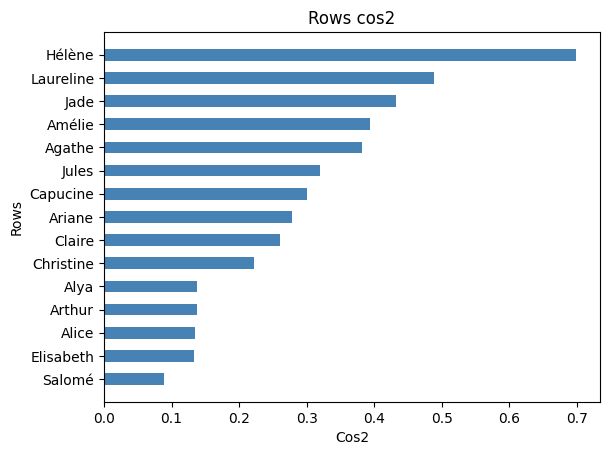

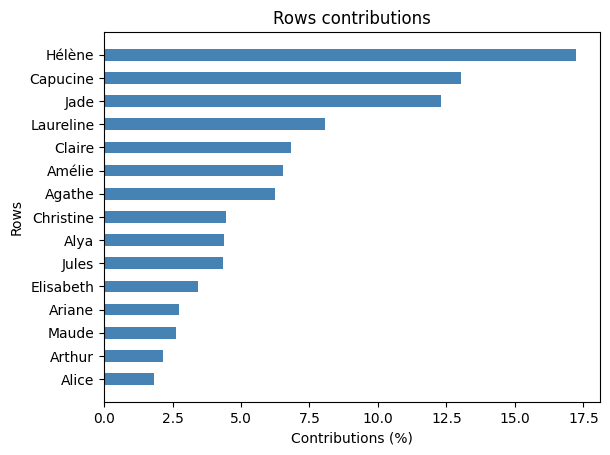

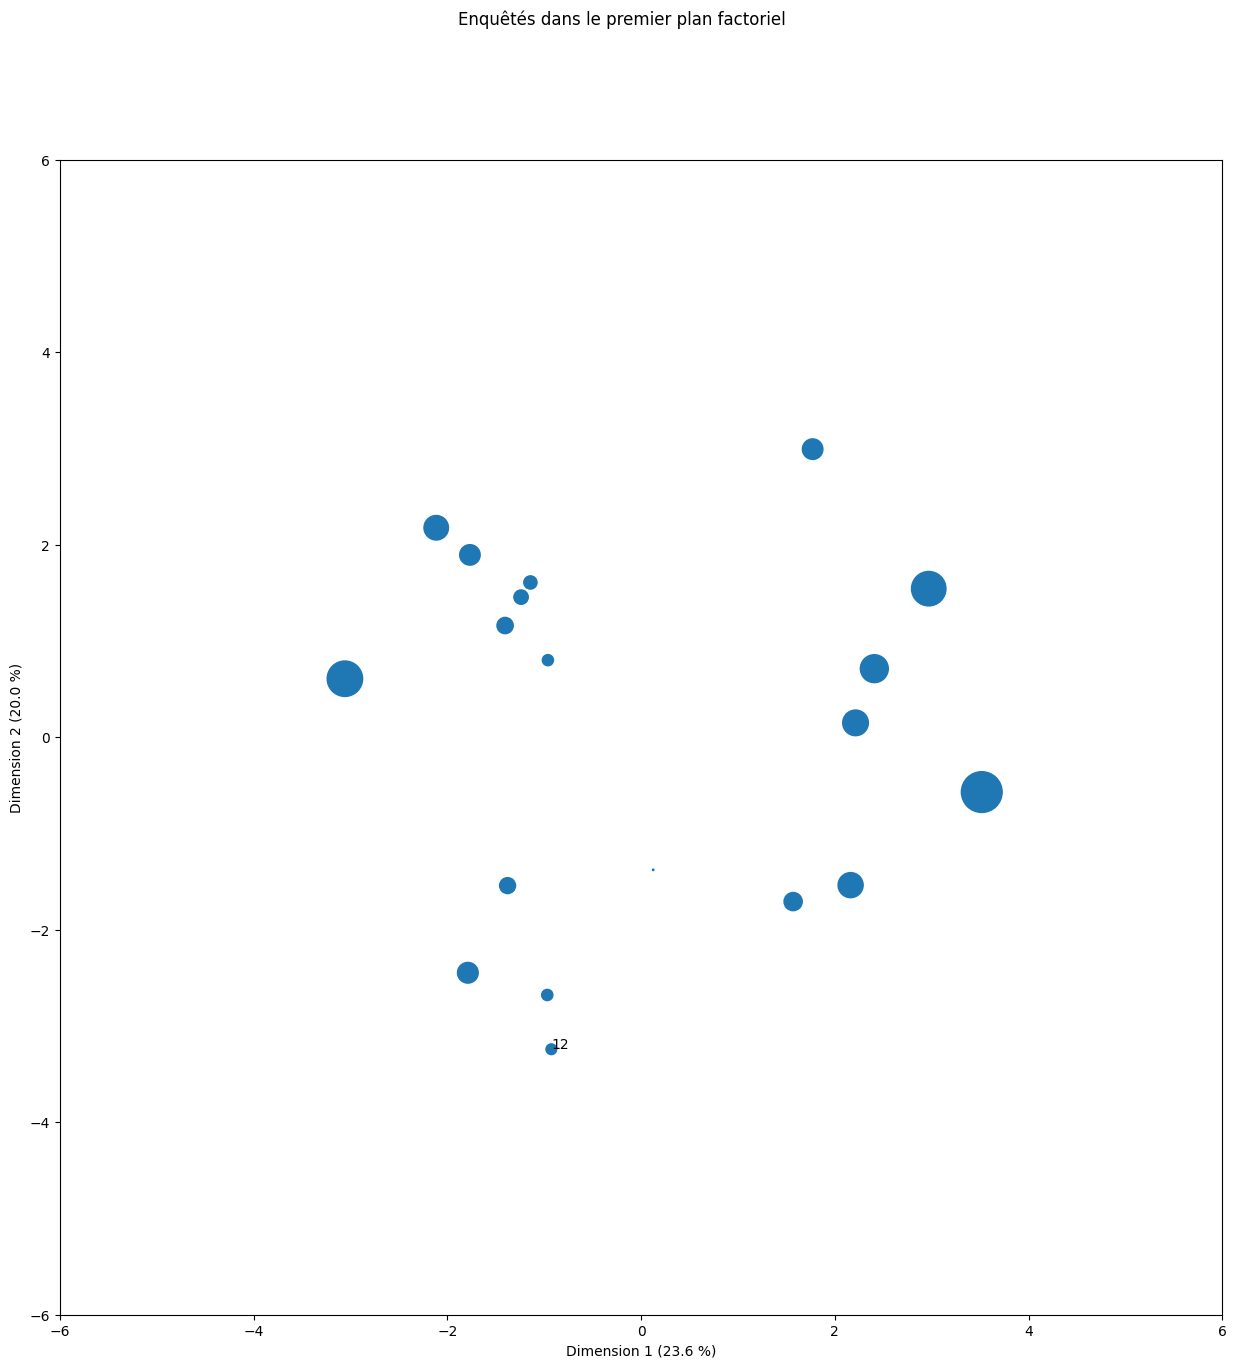

Etape 4 : analyse et représentation des variables
[[ 6.07695101e-01  1.10213018e-01  2.86315980e-01 -4.29074158e-02
  -4.92400904e-01  8.19233317e-02 -3.17240858e-01 -3.04411767e-01
   9.22928789e-03 -2.84633279e-01 -1.42521579e-03 -6.78042935e-02
  -2.44948042e-02  7.01049899e-02  3.22381177e-02 -2.96006528e-03]
 [ 7.64256816e-01 -7.17519209e-02 -4.69409711e-02 -2.15302579e-01
   4.10857999e-01 -2.94980813e-01  1.85583867e-01 -1.30688771e-01
   4.77927345e-02 -1.16538386e-01 -6.13844822e-02  8.79846153e-05
  -1.75326368e-01 -5.58630414e-02 -3.70004439e-02 -1.78133574e-03]
 [ 8.71587043e-01  1.28480360e-01 -2.36137638e-01 -1.03265634e-01
  -3.35085628e-01  9.38565993e-02 -3.64724804e-02  1.65839769e-01
   6.42993180e-03  4.22592184e-02 -2.11241853e-02  4.82500158e-02
   9.74417596e-03 -4.28489816e-02  6.20922106e-03  3.01416355e-02]
 [ 8.60467049e-01  1.93277393e-01 -2.07510400e-01 -6.16785152e-02
  -3.65178278e-01  3.01585299e-02 -4.44268953e-02  1.33605167e-01
  -3.07283653e-02  4.76

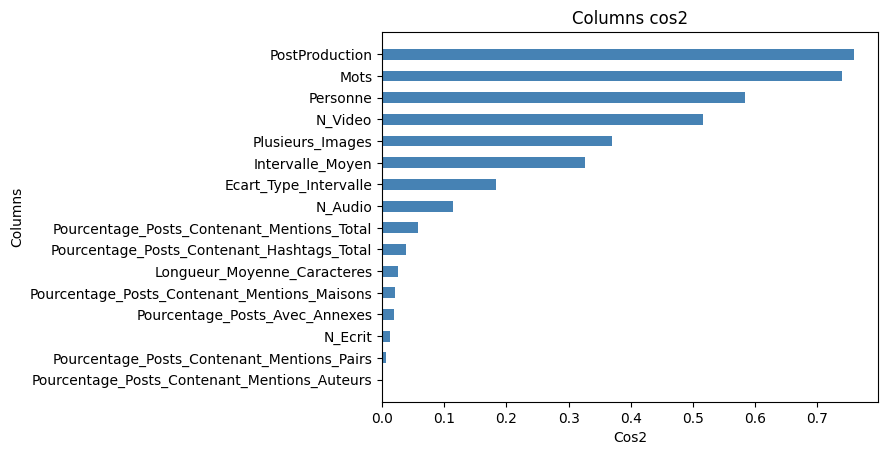

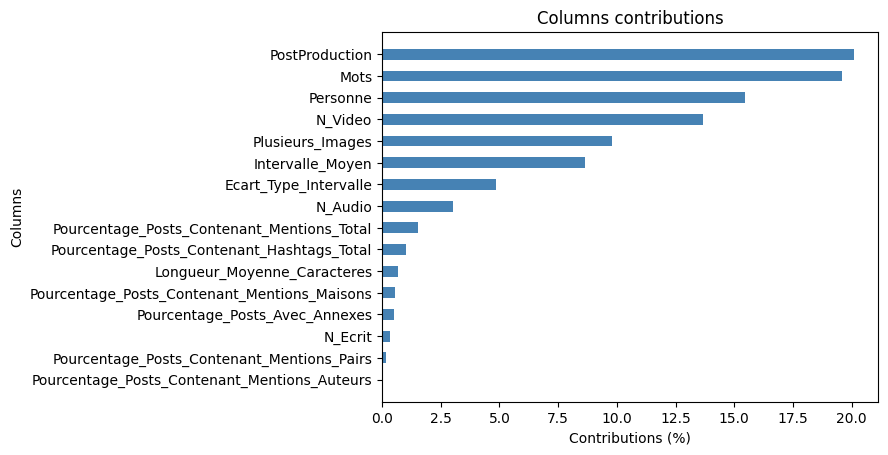

représentation graphique des variables dans le 1 er plan factoriel


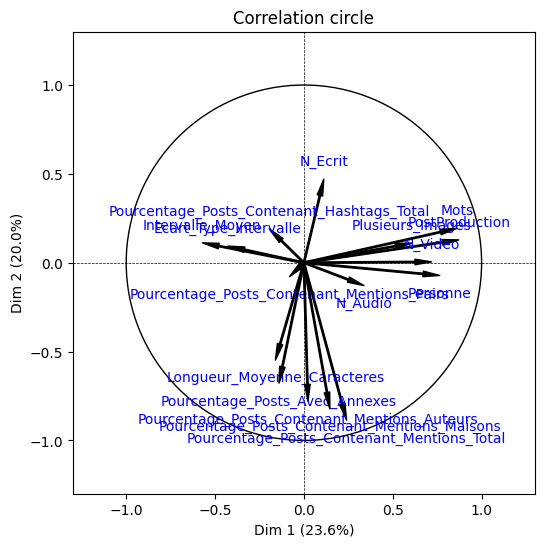

In [6]:
pca_EN= fPCA(std_unit=True, row_labels=Z_EN.index, col_labels=Z_EN.columns)
Z_EN_noisy = Z_EN + np.random.normal(0, 1e-10, Z_EN.shape)
pca_EN.fit(Z_EN_noisy.to_numpy())

print("Etape 2 : Inertie et valeurs propres : ")
print(pca_EN.eig_)
pca_EN.plot_eigenvalues()                  #Graphique des valeurs propres en valeur absolue
pca_EN.plot_eigenvalues(type="percentage") #Graphique des valeurs propres en % d'inertie

eig_EN = pd.DataFrame(pca_EN.eig_).transpose()
eig_EN.columns=["Valeurs propres", "% variance expliquée", "% cum. var. expliquée"]
eig_EN.index.name="Dimension"
eig_EN

inertie=sum(pca_EN.eig_[0])
print(inertie)
p=Z_EN.shape[1]
print(p)

print("Etape 3 : Analyse et représentation des observations")
print(pca_EN.row_coord_)
print(pca_EN.row_contrib_)
print(pca_EN.row_cos2_)
resPCA_EN=pd.DataFrame({"Enquêté" : pca_EN.row_labels,
                    "Coord1" : pca_EN.row_coord_[:,0],
                    "Contrib1" : pca_EN.row_contrib_[:,0],
                    "Cos1" : pca_EN.row_cos2_[:,0],
                    "Coord2" : pca_EN.row_coord_[:,1],
                    "Contrib2" : pca_EN.row_contrib_[:,1],
                    "Cos2" : pca_EN.row_cos2_[:,1]})
resPCA_EN.head()

resPCA_EN.sort_values(by='Cos1', ascending = False).head(15)     # Les 15 premiers enquêtés qui sont bien représentés sur l'axe 1
pca_EN.plot_row_cos2(num_axis=1, nb_values=15)                   # idem mais graphique
resPCA_EN.sort_values(by='Contrib1', ascending = False).head(15) # Les 15 premiers enquêtés qui conbtribuent le plus à l'axe 1
pca_EN.plot_row_contrib(num_axis=1, nb_values=15)                # idem mais graphique

#Représentation graphique des observations dans le 1er plan factoriel
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(resPCA_EN["Coord1"], resPCA_EN["Coord2"], s=resPCA_EN["Contrib1"] * 50)

for enquete in resPCA_EN.index:
    if (abs(resPCA_EN.loc[enquete, 'Cos1']) > 0.9) or (abs(resPCA_EN.loc[enquete, 'Cos2']) > 0.5):
        plt.text(resPCA_EN.loc[enquete, 'Coord1'] + 0.005, resPCA_EN.loc[enquete, 'Coord2'] + 0.005, enquete,
                 horizontalalignment='left', rotation_mode='anchor')
ax.axis([-6, 6, -6, 6])
x_var = round(eig_EN.loc[0, "% variance expliquée"], 2)
y_var = round(eig_EN.loc[1, "% variance expliquée"], 2)
plt.xlabel(f"Dimension 1 ({x_var} %)")
plt.ylabel(f"Dimension 2 ({y_var} %)")

plt.suptitle("Enquêtés dans le premier plan factoriel")
plt.show()

print("Etape 4 : analyse et représentation des variables")
print(pca_EN.col_coord_)   # Coordonnées des points colonnes
print(pca_EN.col_contrib_) # Contributions des points colonnes
print(pca_EN.col_cos2_)    # Cos2 des points colonnes
pca_EN.plot_col_cos2(num_axis=1)    # Classement des variables (les points-colonnes) en fonction de leur cos2 sur le 1er axe
pca_EN.plot_col_contrib(num_axis=1) # Classement des variables en fonction de leur contribution au 1er axe

pd.DataFrame({     "Variable" : Z_EN.columns.tolist(),
                    "Coord1" : pca_EN.col_coord_[:,0],
                    "Coord2" : pca_EN.col_coord_[:,1]
})

print("représentation graphique des variables dans le 1 er plan factoriel")
pca_EN.correlation_circle(num_x_axis=1, num_y_axis=2,figsize = (6,6))

#Variables actives
for j in range(p) :
    ax.text(pca_EN.col_coord_[j,0], pca_EN.col_coord_[j,1], Z_EN.columns[j], color="Blue")

plt.show()


## Clustering

### Nombre de clusters

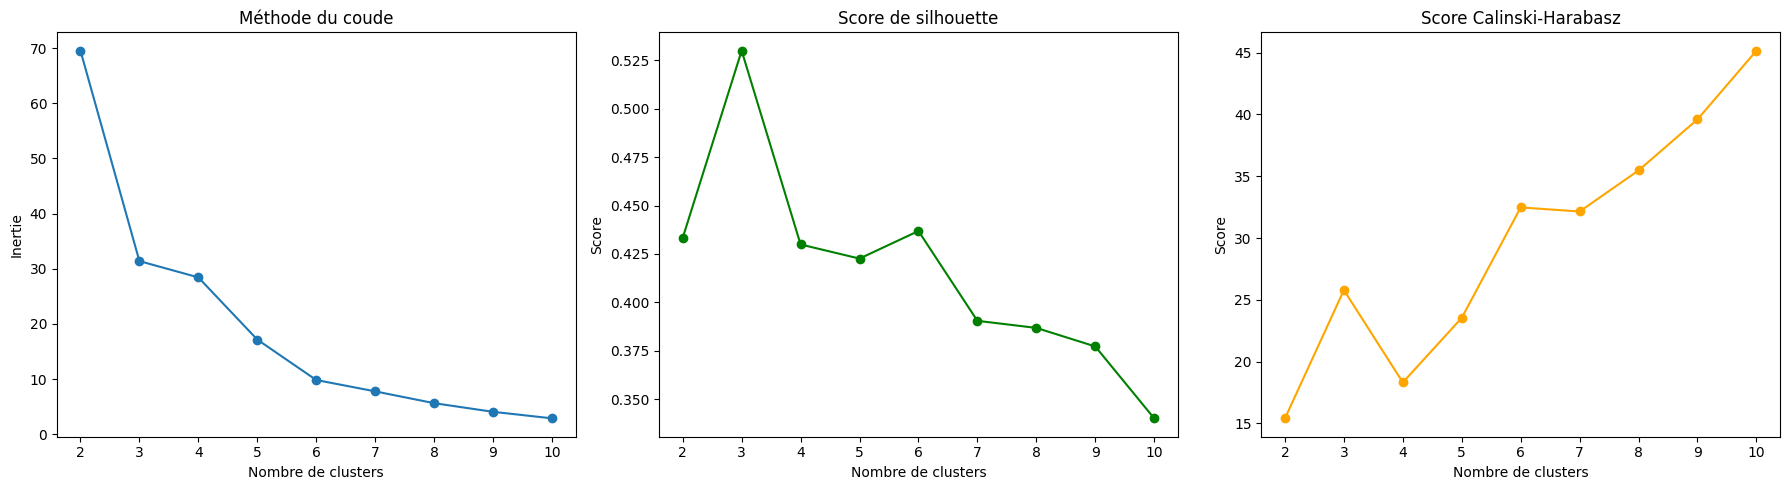

In [11]:
# On part des coordonnées factorielles issues de l'ACP
X_pca_EN = pca_EN.row_coord_[:, :2]

# Tester plusieurs nombres de clusters
range_n = range(2, 11)
inertie = []
silhouette = []
calinski_harabasz = []

for n in range_n:
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(X_pca_EN)

    inertie.append(kmeans.inertia_)  # Inertie intra-cluster
    silhouette.append(silhouette_score(X_pca_EN, labels))  # Score silhouette
    calinski_harabasz.append(calinski_harabasz_score(X_pca_EN, labels))  # Score Calinski-Harabasz

# Affichage des résultats
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Méthode du coude
axs[0].plot(range_n, inertie, marker='o')
axs[0].set_title("Méthode du coude")
axs[0].set_xlabel("Nombre de clusters")
axs[0].set_ylabel("Inertie")

# Score de silhouette
axs[1].plot(range_n, silhouette, marker='o', color='green')
axs[1].set_title("Score de silhouette")
axs[1].set_xlabel("Nombre de clusters")
axs[1].set_ylabel("Score")

# Score Calinski-Harabasz
axs[2].plot(range_n, calinski_harabasz, marker='o', color='orange')
axs[2].set_title("Score Calinski-Harabasz")
axs[2].set_xlabel("Nombre de clusters")
axs[2].set_ylabel("Score")

plt.tight_layout()
plt.show()


### K-Means

In [12]:
X_pca_EN = pca_EN.row_coord_[:, :2]

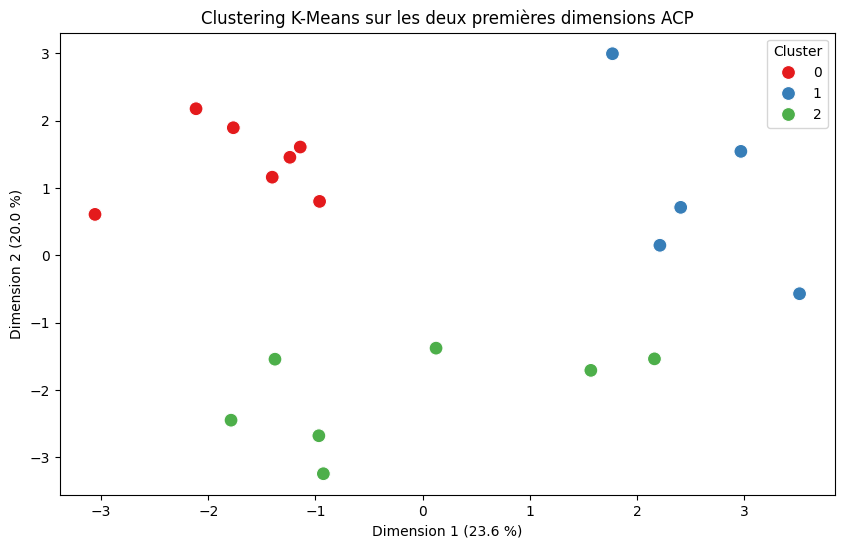

In [15]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca_EN)

# Ajouter au DataFrame
resPCA_EN['Cluster_KMeans'] = labels_kmeans

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=resPCA_EN['Coord1'], y=resPCA_EN['Coord2'], hue=resPCA_EN['Cluster_KMeans'], palette='Set1', s=100)
plt.title("Clustering K-Means sur les deux premières dimensions ACP")
plt.xlabel(f"Dimension 1 ({x_var} %)")
plt.ylabel(f"Dimension 2 ({y_var} %)")
plt.legend(title='Cluster')
plt.show()

### Classification Ascendante Hiérarchique (CAH)

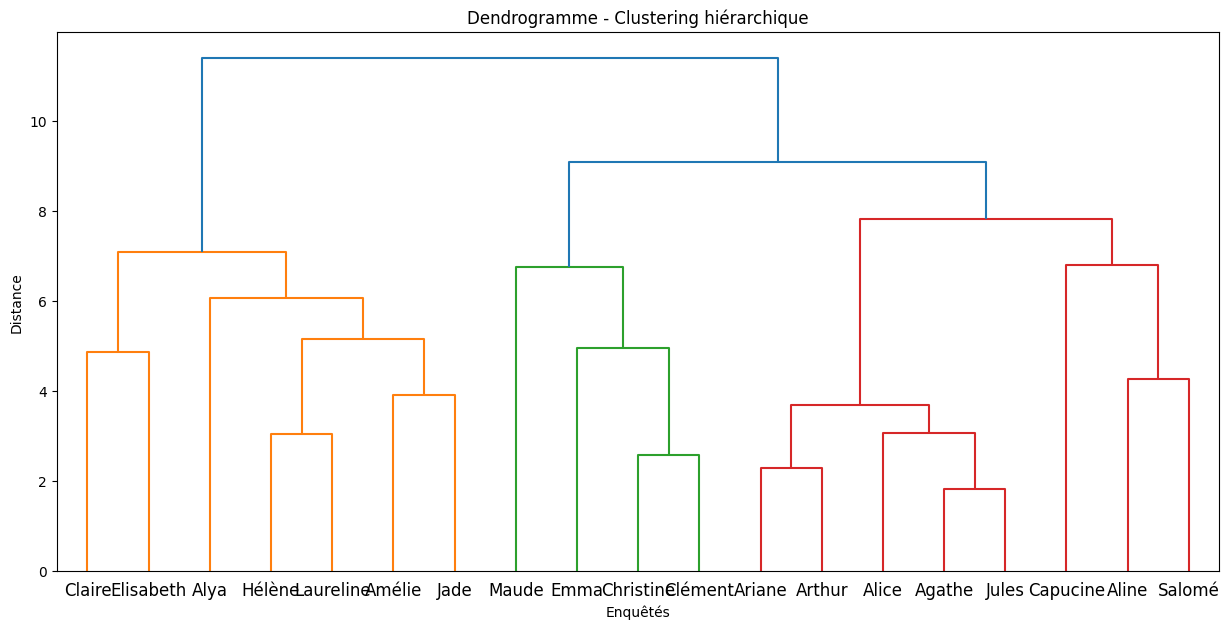

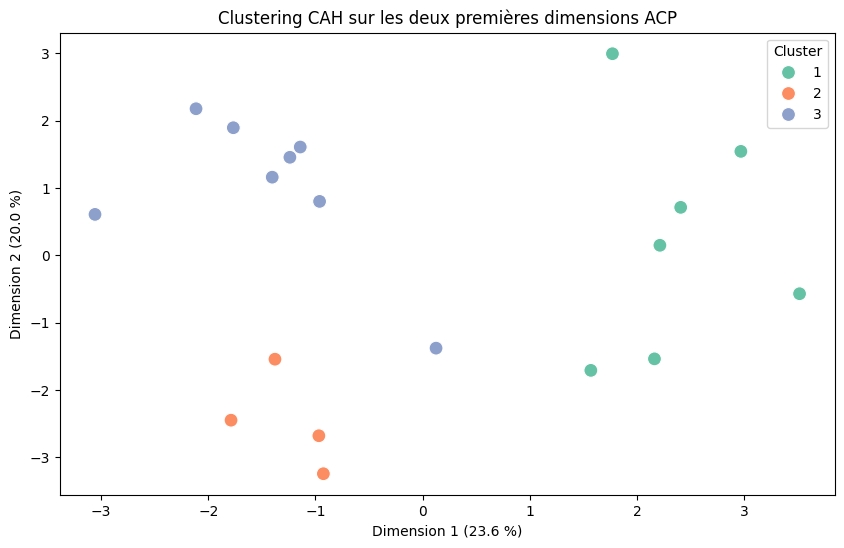

In [19]:
# Matrice de liaison
linked = linkage(X_EN, method='ward', metric='euclidean')
# Dendrogramme
plt.figure(figsize=(15, 7))
dendrogram(linked, labels=pca_EN.row_labels, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Dendrogramme - Clustering hiérarchique")
plt.xlabel("Enquêtés")
plt.ylabel("Distance")
plt.show()

resPCA_EN['Cluster_CAH'] = fcluster(linked, t=3, criterion='maxclust')

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=resPCA_EN['Coord1'], y=resPCA_EN['Coord2'], hue=resPCA_EN['Cluster_CAH'], palette='Set2', s=100)
plt.title("Clustering CAH sur les deux premières dimensions ACP")
plt.xlabel(f"Dimension 1 ({x_var} %)")
plt.ylabel(f"Dimension 2 ({y_var} %)")
plt.legend(title='Cluster')
plt.show()

## Analyses

In [20]:
# Ajout des labels K-means et CAH dans df
df_EN['Cluster_KM'] = labels_kmeans
df_EN['Cluster_CAH'] = resPCA_EN['Cluster_CAH'].values

In [21]:
# Afficher les moyennes des variables par cluster des K-Means
profil_clusters_KM = df_EN.groupby('Cluster_KM').mean()
print("Profils moyens par cluster K-means :")
print(profil_clusters_KM.T)

Profils moyens par cluster K-means :
Cluster_KM                                              0            1  \
Plusieurs_Images                                16.279762    58.248062   
Personne                                         0.446429    12.410148   
PostProduction                                   5.405844    82.721635   
Mots                                             5.405844    82.721635   
N_Ecrit                                        100.000000    98.787879   
N_Video                                          3.290043    19.826638   
N_Audio                                          0.000000     2.424242   
Pourcentage_Posts_Contenant_Hashtags_Total      98.023363    81.085271   
Pourcentage_Posts_Contenant_Mentions_Total      24.834133    43.257223   
Longueur_Moyenne_Caracteres                   1296.158363  1065.455363   
Pourcentage_Posts_Avec_Annexes                   2.452828     0.000000   
Intervalle_Moyen                                17.351285     6.199147   
E

In [22]:
# Afficher les moyennes des variables par cluster du CAH
profil_clusters_CAH = df_EN.groupby('Cluster_CAH').mean()
print("Profils moyens par cluster CAH :")
print(profil_clusters_CAH.T)

Profils moyens par cluster CAH :
Cluster_CAH                                             1            2  \
Plusieurs_Images                                57.072348    17.932501   
Personne                                        14.307940     0.000000   
PostProduction                                  71.241260     7.488183   
Mots                                            68.058656     6.878427   
N_Ecrit                                         98.687771    90.348837   
N_Video                                         20.483889     1.829268   
N_Audio                                          3.114090     0.000000   
Pourcentage_Posts_Contenant_Hashtags_Total      82.025194    73.898185   
Pourcentage_Posts_Contenant_Mentions_Total      55.854814    74.222915   
Longueur_Moyenne_Caracteres                   1197.091964  1805.496583   
Pourcentage_Posts_Avec_Annexes                   9.591014    39.866704   
Intervalle_Moyen                                 6.865878    13.034658   
Ecart

In [23]:
# Afficher les individus avec leur cluster
df_EN[['Cluster_KM']]

,Cluster_KM
Nom_d_emprunt,
Agathe,0
Alice,0
Aline,2
Alya,1
Amélie,2
Ariane,0
Arthur,0
Capucine,0
Christine,2


In [24]:
# Vérifier la contingence des regroupements entre les deux méthodes :
contingence = pd.crosstab(df_EN['Cluster_CAH'], df_EN['Cluster_KM'],  margins = True)
contingence

Cluster_KM,0,1,2,All
Cluster_CAH,,,,
1,0,5,2,7
2,0,0,4,4
3,7,0,1,8
All,7,5,7,19


In [27]:
# Calcul du V de Cramér pour analyser cette contingence
chi2 = stats.chi2_contingency(contingence)[0]
n = contingence.sum().sum()
phi2 = chi2 / n
r, k = contingence.shape
phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
rcorr = r - ((r - 1)**2) / (n - 1)
kcorr = k - ((k - 1)**2) / (n - 1)
cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
print(f"V de Cramér : {cramers_v:.3f}")

V de Cramér : 0.260


# Couple enquêté période

### Ouverture des données et prétraitements de celles-ci.

In [74]:
df_EN_PE = pd.read_excel('/content/drive/MyDrive/Clustering_Memoire/Clustering_Data.xlsx',index_col=0)

#rajouter à l'index la periode  à la fin
df_EN_PE["Periode"] = df_EN_PE["Periode"].astype(str)
df_EN_PE.index = df_EN_PE.index + "_" + df_EN_PE["Periode"]
# Nettoyer les espaces en trop dans l'index
df_EN_PE.index = df_EN_PE.index.str.strip().str.replace(r'\s+_', '_', regex=True)

df_EN_PE.head()
df_EN_PE.shape
#df_EN_PE.columns
#df_EN_PE.describe()

(69, 20)

In [75]:
df_EN_PE.drop(columns=['Periode','Nombre_Total_Hashtags','Ecart_Type_Intervalle','Nombre_Total_Mentions','Intervalle_Moyen'], inplace=True)
df_EN_PE.head()

,Longueur_Moyenne_Caracteres,Pourcentage_Posts_Avec_Annexes,Pourcentage_Posts_Contenant_Mentions_Total,Pourcentage_Posts_Contenant_Mentions_Pairs,Pourcentage_Posts_Contenant_Mentions_Auteurs,Pourcentage_Posts_Contenant_Mentions_Maisons,Nombre_de_Posts,Pourcentage_Posts_Contenant_Hashtags_Total,Plusieurs_Images,Personne,PostProduction,Mots,N_Ecrit,N_Video,N_Audio
Agathe_1,1157.5,0.0,0.0,0.0,0.0,0.0,2,100.0,0.0,0.0,0.0,0.0,100,0.0,0
Alice_1,878.6,0.0,10.0,10.0,0.0,0.0,10,100.0,0.0,0.0,0.0,0.0,100,20.0,0
Alice_2,1322.6,0.0,40.0,30.0,0.0,0.0,10,100.0,0.0,0.0,0.0,0.0,100,20.0,0
Alice_4,1507.3,0.0,20.0,10.0,0.0,0.0,10,100.0,0.0,0.0,0.0,0.0,100,20.0,0
Aline_1,463.9,0.0,40.0,0.0,10.0,20.0,10,0.0,0.0,10.0,90.0,90.0,100,0.0,0


Création de la matrice des variables centrées-réduites

In [76]:
Z_EN_PE =df_EN_PE
X_EN_PE=pd.DataFrame(StandardScaler().fit_transform(Z_EN_PE), index=Z_EN_PE.index, columns=Z_EN_PE.columns)
X_EN_PE.shape
X_EN_PE.head()

,Longueur_Moyenne_Caracteres,Pourcentage_Posts_Avec_Annexes,Pourcentage_Posts_Contenant_Mentions_Total,Pourcentage_Posts_Contenant_Mentions_Pairs,Pourcentage_Posts_Contenant_Mentions_Auteurs,Pourcentage_Posts_Contenant_Mentions_Maisons,Nombre_de_Posts,Pourcentage_Posts_Contenant_Hashtags_Total,Plusieurs_Images,Personne,PostProduction,Mots,N_Ecrit,N_Video,N_Audio
Agathe_1,-0.384027,-0.550789,-1.495499,-0.426134,-0.813842,-1.038913,-2.221626,0.610730,-0.88567,-0.442821,-0.891787,-0.830825,0.20383,-0.605086,-0.197046
Alice_1,-0.787245,-0.550789,-1.223231,0.285235,-0.813842,-1.038913,0.455967,0.610730,-0.88567,-0.442821,-0.891787,-0.830825,0.20383,0.734516,-0.197046
Alice_2,-0.145334,-0.550789,-0.406428,1.707974,-0.813842,-1.038913,0.455967,0.610730,-0.88567,-0.442821,-0.891787,-0.830825,0.20383,0.734516,-0.197046
Alice_4,0.121695,-0.550789,-0.950964,0.285235,-0.813842,-1.038913,0.455967,0.610730,-0.88567,-0.442821,-0.891787,-0.830825,0.20383,0.734516,-0.197046
Aline_1,-1.386795,-0.550789,-0.406428,-0.426134,-0.488619,-0.466197,0.455967,-3.163037,-0.88567,0.141026,1.371700,1.435394,0.20383,-0.605086,-0.197046


## Réduction des dimensions avec une ANALYSE EN COMPOSANTE PRINCIPALES (ACP)

Etape 2 : Inertie et valeurs propres : 
[[3.22074736e+00 2.51579527e+00 1.70494362e+00 1.37132255e+00
  1.14698556e+00 1.12416946e+00 9.31840671e-01 7.79881956e-01
  6.78146301e-01 5.18083171e-01 3.69154174e-01 3.29193304e-01
  2.25092607e-01 7.22990707e-02 1.23449241e-02]
 [2.14716491e+01 1.67719684e+01 1.13662908e+01 9.14215034e+00
  7.64657043e+00 7.49446308e+00 6.21227114e+00 5.19921304e+00
  4.52097534e+00 3.45388781e+00 2.46102783e+00 2.19462202e+00
  1.50061738e+00 4.81993805e-01 8.22994941e-02]
 [2.14716491e+01 3.82436175e+01 4.96099083e+01 5.87520586e+01
  6.63986291e+01 7.38930921e+01 8.01053633e+01 8.53045763e+01
  8.98255517e+01 9.32794395e+01 9.57404673e+01 9.79350893e+01
  9.94357067e+01 9.99177005e+01 1.00000000e+02]]


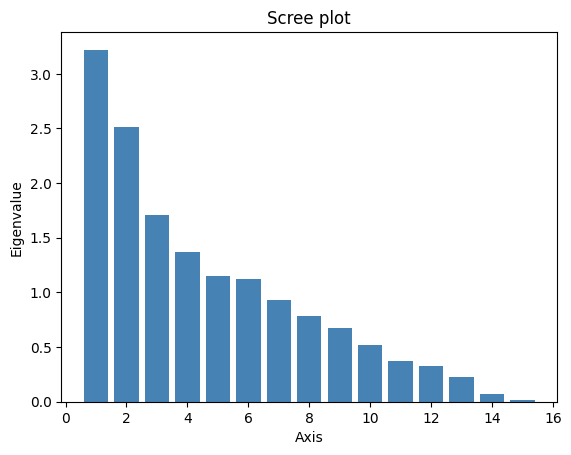

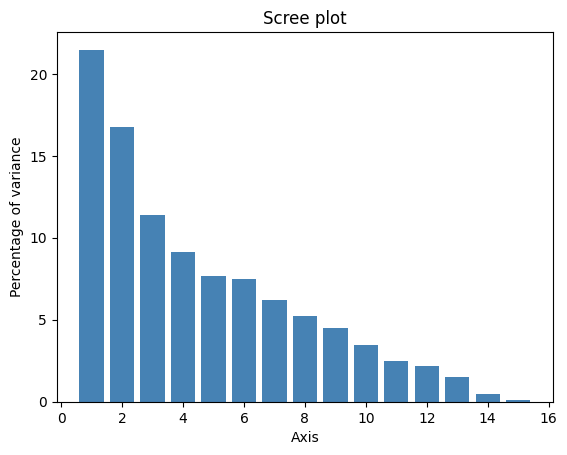

15.0
15
 Etape 3 : Analyse et représentation des observations
[[-0.54026724  2.57741588  1.39581749 ... -0.14933036  0.48732172
   0.01624074]
 [-1.02433211  2.09093163 -0.40351859 ...  0.24930149  0.12566718
  -0.02254668]
 [-0.4080045   1.53051558 -0.98815559 ... -0.01483891 -0.14163223
  -0.02517345]
 ...
 [-0.64208904 -1.17013793 -1.80371011 ...  0.29057901 -0.61336618
  -0.11120172]
 [-0.02168984  1.27104448 -0.29299019 ... -0.02212244 -0.15755544
  -0.01626284]
 [-0.27714464  2.19917591  1.1376578  ...  0.10139861 -0.16150858
   0.02921368]]
[[1.31344389e-01 3.82687797e+00 1.65614424e+00 ... 1.43577339e-01
  4.76046895e+00 3.09652345e-02]
 [4.72145470e-01 2.51857725e+00 1.38410163e-01 ... 4.00165304e-01
  3.16564293e-01 5.96798245e-02]
 [7.49073040e-02 1.34943236e+00 8.30025714e-01 ... 1.41773036e-03
  4.02107693e-01 7.43957239e-02]
 ...
 [1.85517447e-01 7.88768813e-01 2.76550448e+00 ... 5.43648470e-01
  7.54150185e+00 1.45172877e+00]
 [2.11693138e-04 9.30672989e-01 7.29704540e-0

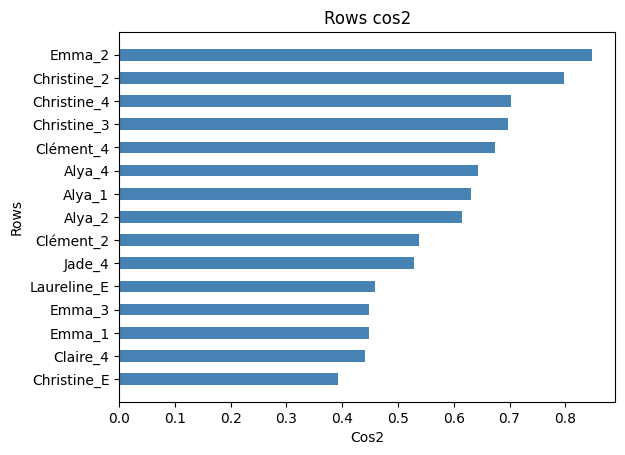

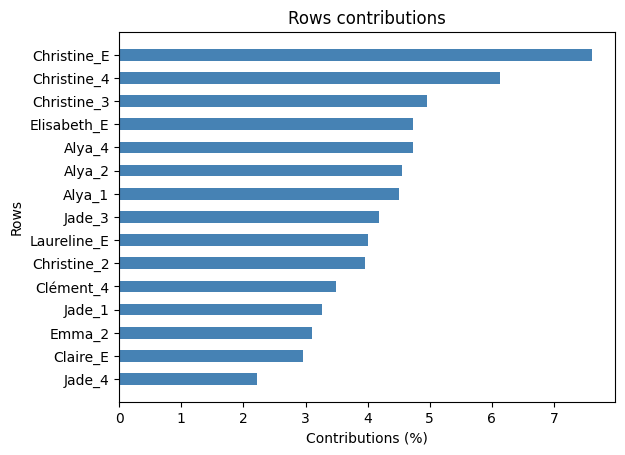

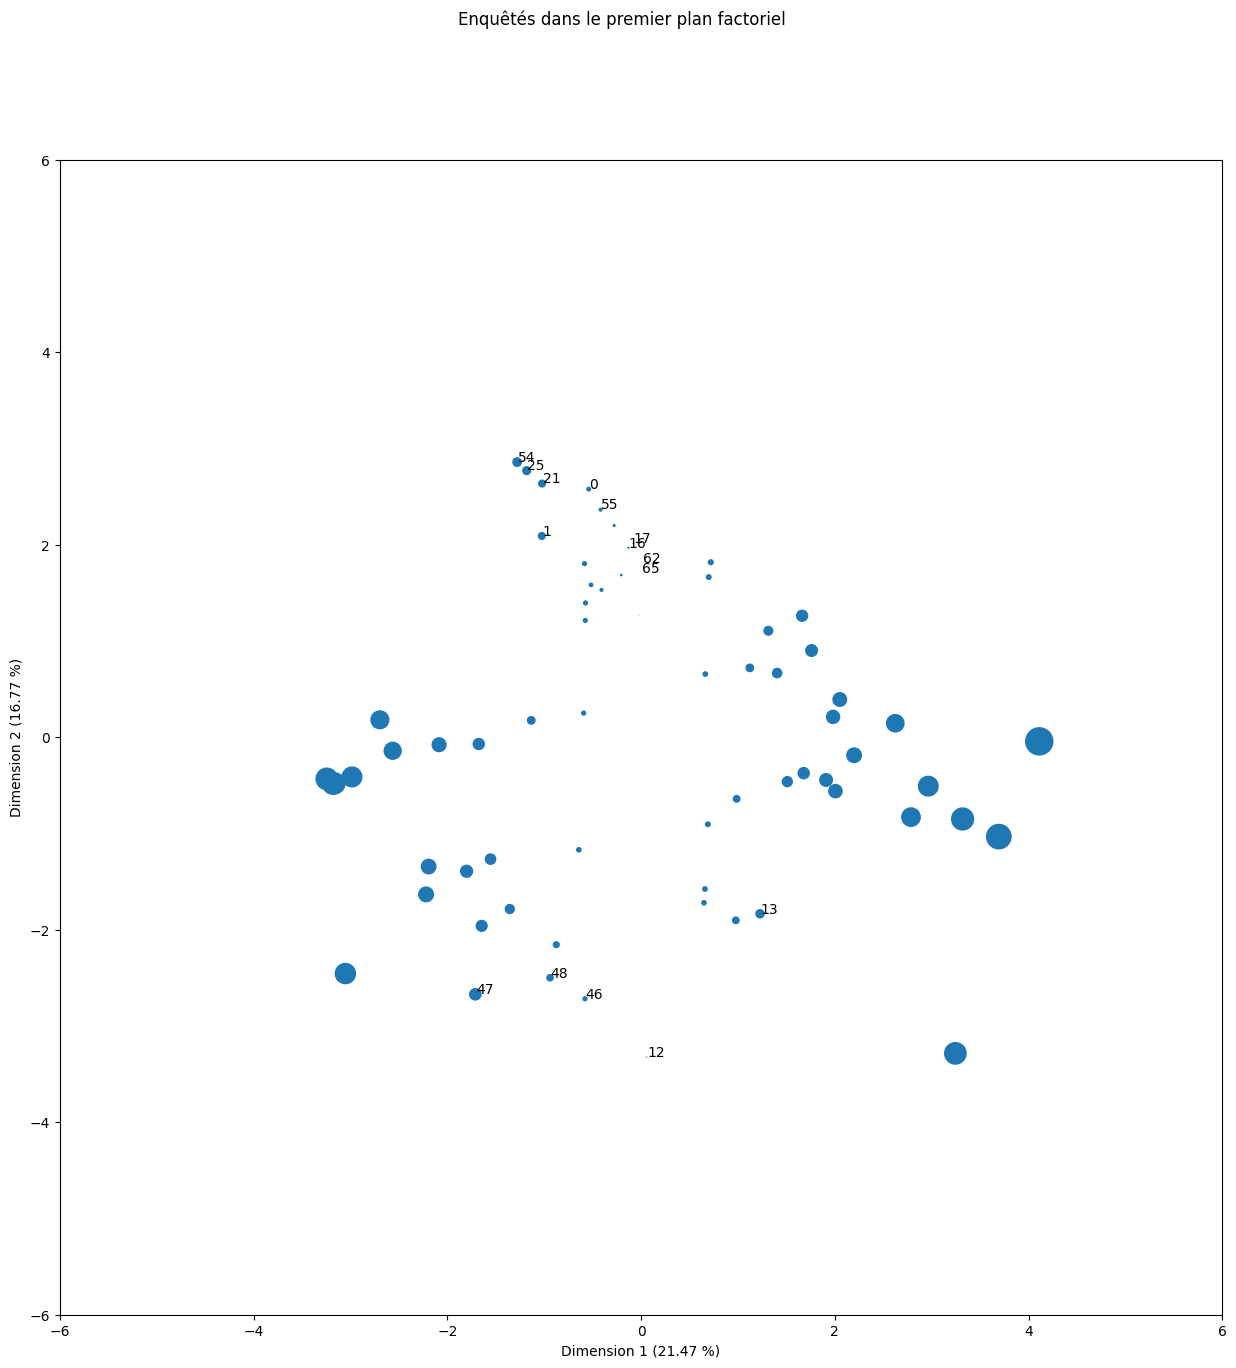

Etape 4 :analyse et représentation des variables
[[ 6.63888684e-01 -3.40730417e-01  4.06568927e-01 -2.21241721e-01
   9.40941820e-02 -1.49022716e-01 -1.01768434e-01 -1.26615248e-01
  -2.73773764e-02  2.18698875e-01 -9.39707977e-02  4.89254939e-02
  -3.33790885e-01  1.43197790e-02  5.86021952e-03]
 [ 6.93770429e-01 -2.43721716e-01  3.69105241e-01 -5.71403845e-02
  -2.96611534e-01 -3.23932112e-02  4.46081363e-02 -2.07352518e-01
   1.08584698e-01  1.93635642e-01 -2.14241951e-01  9.39552371e-02
   2.84891696e-01 -2.42593873e-02 -1.24323423e-03]
 [ 6.91074613e-01 -5.36824344e-01 -3.01112124e-01  1.33531238e-01
   6.48725005e-02  1.70145908e-01  3.67125537e-03  8.72248367e-02
   3.55301255e-02 -8.30981978e-02  7.73007593e-02 -1.87069200e-01
  -1.92562281e-02 -1.88190265e-01  5.68399590e-03]
 [ 8.11531997e-02 -1.62849466e-01 -5.47122527e-01 -3.58314297e-01
   5.04429275e-01  2.42936312e-01 -4.55594970e-03  1.83994887e-01
   1.96155556e-01  3.80984816e-01 -6.25700138e-03  9.84650206e-03
   7.3

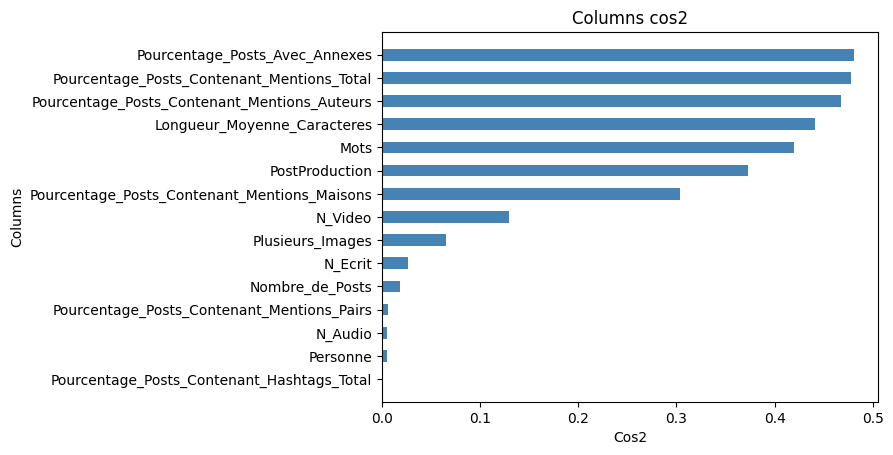

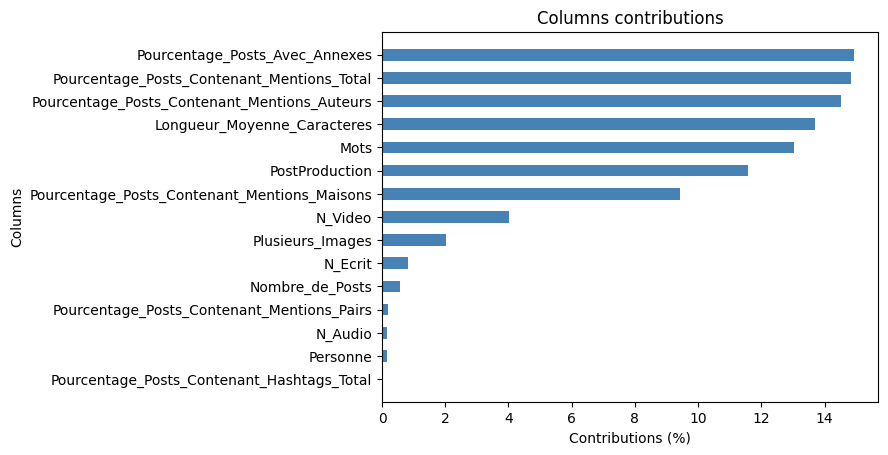

représentation graphique des variables dans le 1 er plan factoriel


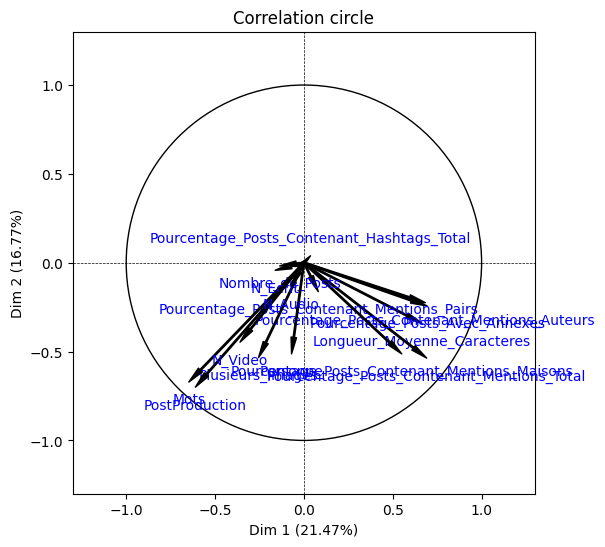

In [77]:
pca_EN_PE= fPCA(std_unit=True, row_labels=Z_EN_PE.index, col_labels=Z_EN_PE.columns)
pca_EN_PE.fit(Z_EN_PE.to_numpy())

print("Etape 2 : Inertie et valeurs propres : ")
print(pca_EN_PE.eig_)
pca_EN_PE.plot_eigenvalues()                 #Graphique des valeurs propres en valeur absolue
pca_EN_PE.plot_eigenvalues(type="percentage") #Graphique des valeurs propres en % d'inertie

eig_EN_PE = pd.DataFrame(pca_EN_PE.eig_).transpose()
eig_EN_PE.columns=["Valeurs propres", "% variance expliquée", "% cum. var. expliquée"]
eig_EN_PE.index.name="Dimension"
eig_EN_PE

inertie=sum(pca_EN_PE.eig_[0])
print(inertie)
p=Z_EN_PE.shape[1]
print(p)

print(" Etape 3 : Analyse et représentation des observations")
# Analyse
print(pca_EN_PE.row_coord_)
print(pca_EN_PE.row_contrib_)
print(pca_EN_PE.row_cos2_)
resPCA_EN_PE=pd.DataFrame({"Enquêté" : pca_EN_PE.row_labels,
                    "Coord1" : pca_EN_PE.row_coord_[:,0],
                    "Contrib1" : pca_EN_PE.row_contrib_[:,0],
                    "Cos1" : pca_EN_PE.row_cos2_[:,0],
                    "Coord2" : pca_EN_PE.row_coord_[:,1],
                    "Contrib2" : pca_EN_PE.row_contrib_[:,1],
                    "Cos2" : pca_EN_PE.row_cos2_[:,1]})
resPCA_EN_PE.head()

resPCA_EN_PE.sort_values(by='Cos1', ascending = False).head(15)
pca_EN_PE.plot_row_cos2(num_axis=1, nb_values=15)
resPCA_EN_PE.sort_values(by='Contrib1', ascending = False).head(15)
pca_EN_PE.plot_row_contrib(num_axis=1, nb_values=15)

#Représentation graphique des observations dans le 1er plan factoriel
fig, ax = plt.subplots(figsize=(15, 15))
ax.scatter(resPCA_EN_PE["Coord1"], resPCA_EN_PE["Coord2"], s=resPCA_EN_PE["Contrib1"] * 50)

for enquete in resPCA_EN_PE.index:
    if (abs(resPCA_EN_PE.loc[enquete, 'Cos1']) > 0.9) or (abs(resPCA_EN_PE.loc[enquete, 'Cos2']) > 0.5):
        plt.text(resPCA_EN_PE.loc[enquete, 'Coord1'] + 0.005, resPCA_EN_PE.loc[enquete, 'Coord2'] + 0.005, enquete,
                 horizontalalignment='left', rotation_mode='anchor')
ax.axis([-6, 6, -6, 6])
x_var = round(eig_EN_PE.loc[0, "% variance expliquée"], 2)
y_var = round(eig_EN_PE.loc[1, "% variance expliquée"], 2)
plt.xlabel(f"Dimension 1 ({x_var} %)")
plt.ylabel(f"Dimension 2 ({y_var} %)")

plt.suptitle("Enquêtés dans le premier plan factoriel")
plt.show()


print("Etape 4 :analyse et représentation des variables")
print(pca_EN_PE.col_coord_)   # Coordonnées des points colonnes
print(pca_EN_PE.col_contrib_) # Contributions des points colonnes
print(pca_EN_PE.col_cos2_)    # Cos2 des points colonnes
pca_EN_PE.plot_col_cos2(num_axis=1)
pca_EN_PE.plot_col_contrib(num_axis=1)

pd.DataFrame({     "Variable" : Z_EN_PE.columns.tolist(),
                    "Coord1" : pca_EN_PE.col_coord_[:,0],
                    "Coord2" : pca_EN_PE.col_coord_[:,1]
})

print("représentation graphique des variables dans le 1 er plan factoriel")
pca_EN_PE.correlation_circle(num_x_axis=1, num_y_axis=2,figsize = (6,6))

#Variables actives
for j in range(p) :
    ax.text(pca_EN_PE.col_coord_[j,0], pca_EN_PE.col_coord_[j,1], Z_EN_PE.columns[j], color="Blue")

plt.show()


/tmp/ipython-input-2061201154.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  couleurs = plt.cm.get_cmap('tab20', len(enquete_uniques))


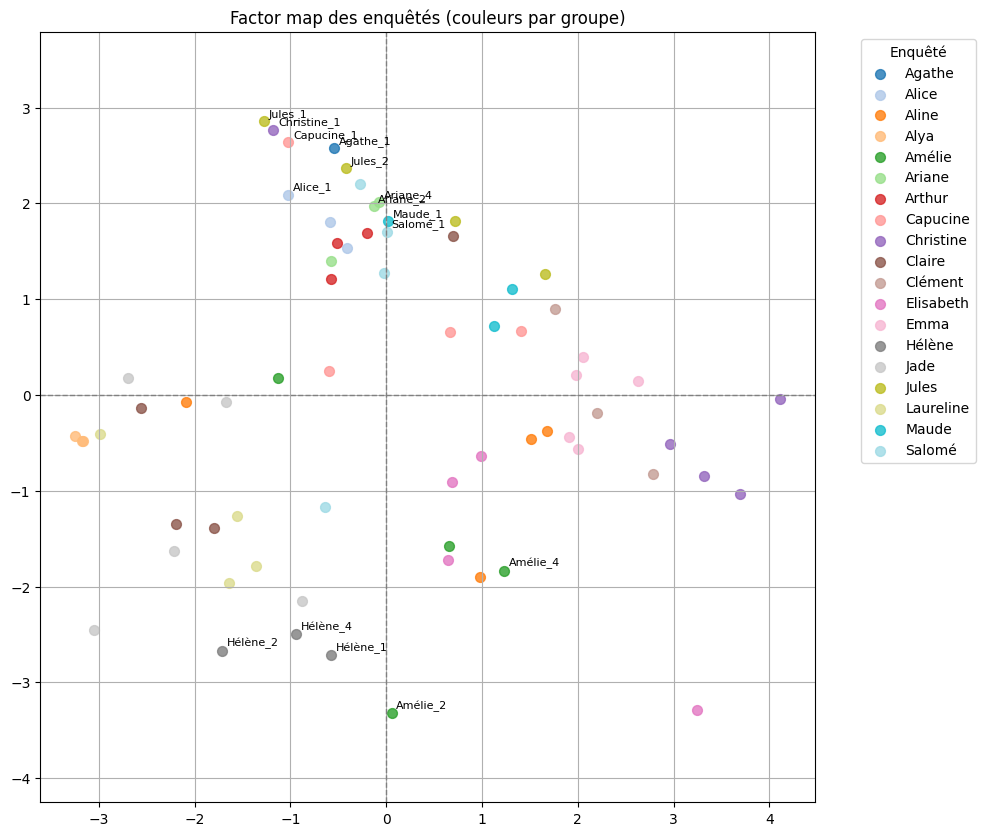

In [93]:
#Extraire l'enquete depuis l'index
resPCA_EN_PE["enquete"] = resPCA_EN_PE["Enquêté"].str.split("_").str[0]

enquete_uniques = resPCA_EN_PE["enquete"].unique()
couleurs = plt.cm.get_cmap('tab20', len(enquete_uniques))
couleur_dict = {enquete: couleurs(i) for i, enquete in enumerate(enquete_uniques)}

fig, ax = plt.subplots(figsize=(10, 10))

for enquete in enquete_uniques:
    sous_df = resPCA_EN_PE[resPCA_EN_PE["enquete"] == enquete]
    ax.scatter(
        sous_df["Coord1"], sous_df["Coord2"],
        s=50,
        color=couleur_dict[enquete],
        label=enquete,
        alpha=0.8
    )
  # Ajouter les noms des enquêtés bien représentés
for i in resPCA_EN_PE.index:
    if (abs(resPCA_EN_PE.loc[i, 'Cos1']) > 0.9) or (abs(resPCA_EN_PE.loc[i, 'Cos2']) > 0.5):
        ax.text(
            resPCA_EN_PE.loc[i, 'Coord1'] + 0.05,
            resPCA_EN_PE.loc[i, 'Coord2'] + 0.05,
            resPCA_EN_PE.loc[i, 'Enquêté'],
            fontsize=8
        )

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.axvline(0, color='gray', linestyle='--', linewidth=1)

plt.title("Factor map des enquêtés (couleurs par groupe)")
plt.legend(title="Enquêté", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.axis('equal')
plt.show()

/tmp/ipython-input-1350620549.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  couleurs = plt.cm.get_cmap('tab20', len(periode_uniques))


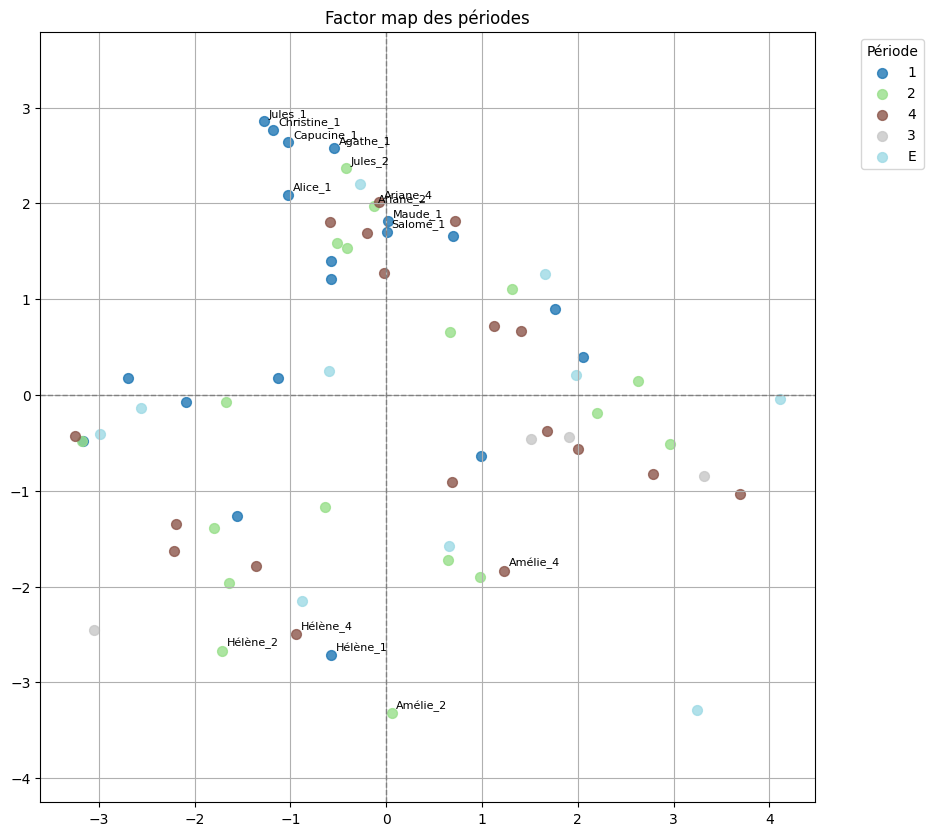

In [96]:
#Extraire la période depuis l'index
resPCA_EN_PE["periode"] = resPCA_EN_PE["Enquêté"].str.split("_").str[1]

periode_uniques = resPCA_EN_PE["periode"].unique()
couleurs = plt.cm.get_cmap('tab20', len(periode_uniques))
couleur_dict = {periode: couleurs(i) for i, periode in enumerate(periode_uniques)}

fig, ax = plt.subplots(figsize=(10, 10))

for periode in periode_uniques:
    sous_df = resPCA_EN_PE[resPCA_EN_PE["periode"] == periode]
    ax.scatter(
        sous_df["Coord1"], sous_df["Coord2"],
        s=50,
        color=couleur_dict[periode],
        label=periode,
        alpha=0.8
    )
# Ajouter les noms des périodes bien représentés
for i in resPCA_EN_PE.index:
    if (abs(resPCA_EN_PE.loc[i, 'Cos1']) > 0.9) or (abs(resPCA_EN_PE.loc[i, 'Cos2']) > 0.5):
        ax.text(
            resPCA_EN_PE.loc[i, 'Coord1'] + 0.05,
            resPCA_EN_PE.loc[i, 'Coord2'] + 0.05,
            resPCA_EN_PE.loc[i, 'Enquêté'],
            fontsize=8
        )

ax.axhline(0, color='gray', linestyle='--', linewidth=1)
ax.axvline(0, color='gray', linestyle='--', linewidth=1)

plt.title("Factor map des périodes")
plt.legend(title="Période", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.axis('equal')
plt.show()

## Clustering

### Nombre de clusters

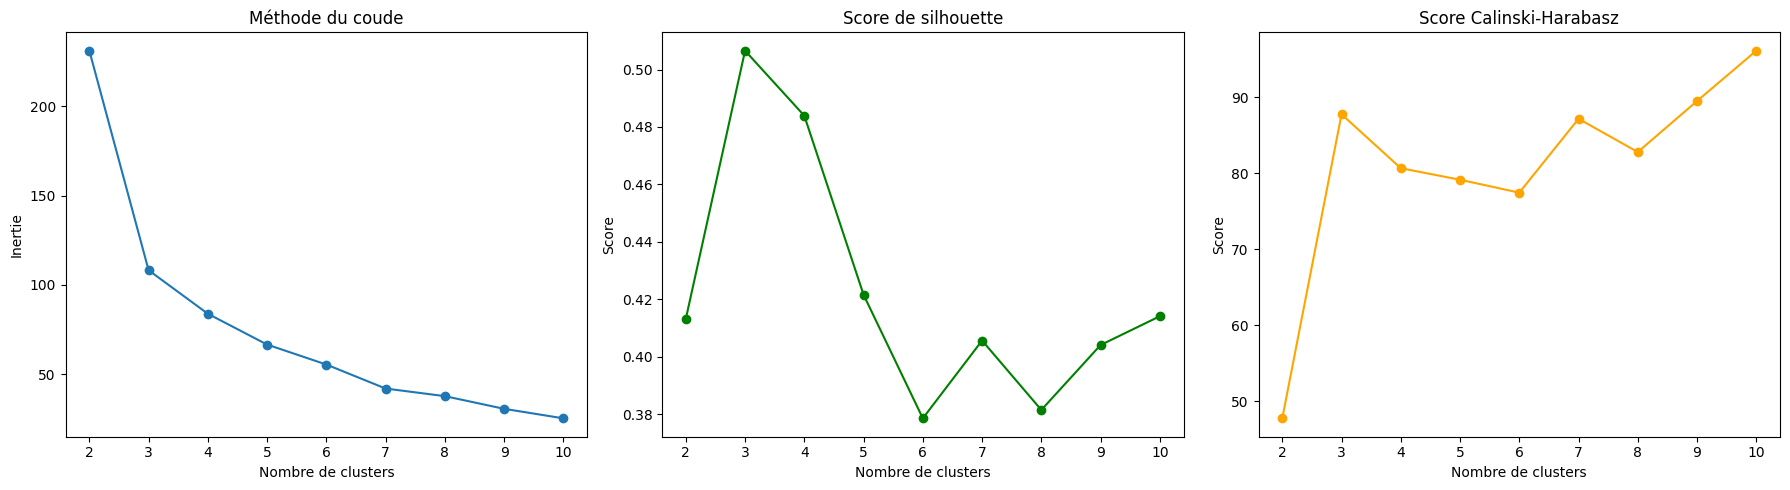

In [97]:
# On part des coordonnées factorielles issues de l'ACP
X_pca_EN_PE = pca_EN_PE.row_coord_[:, :2]

# Tester plusieurs nombres de clusters
range_n = range(2, 11)
inertie = []
silhouette = []
calinski_harabasz = []

for n in range_n:
    kmeans = KMeans(n_clusters=n, random_state=42)
    labels = kmeans.fit_predict(X_pca_EN_PE)

    inertie.append(kmeans.inertia_)  # Inertie intra-cluster
    silhouette.append(silhouette_score(X_pca_EN_PE, labels))  # Score silhouette
    calinski_harabasz.append(calinski_harabasz_score(X_pca_EN_PE, labels))  # Score Calinski-Harabasz

# Affichage des résultats
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Méthode du coude
axs[0].plot(range_n, inertie, marker='o')
axs[0].set_title("Méthode du coude")
axs[0].set_xlabel("Nombre de clusters")
axs[0].set_ylabel("Inertie")

# Score de silhouette
axs[1].plot(range_n, silhouette, marker='o', color='green')
axs[1].set_title("Score de silhouette")
axs[1].set_xlabel("Nombre de clusters")
axs[1].set_ylabel("Score")

# Score Calinski-Harabasz
axs[2].plot(range_n, calinski_harabasz, marker='o', color='orange')
axs[2].set_title("Score Calinski-Harabasz")
axs[2].set_xlabel("Nombre de clusters")
axs[2].set_ylabel("Score")

plt.tight_layout()
plt.show()


### K-Means

In [98]:
X_pca_EN_PE = pca_EN_PE.row_coord_[:, :2]

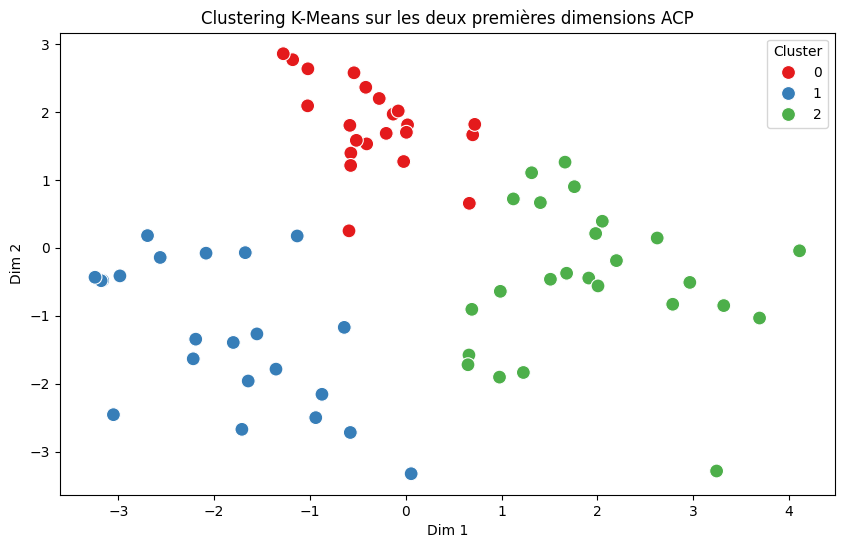

In [100]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca_EN_PE)

# Ajouter au DataFrame
resPCA_EN_PE['Cluster_KMeans'] = labels_kmeans

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=resPCA_EN_PE['Coord1'], y=resPCA_EN_PE['Coord2'], hue=resPCA_EN_PE['Cluster_KMeans'], palette='Set1', s=100)
plt.title("Clustering K-Means sur les deux premières dimensions ACP")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title='Cluster')
plt.show()

### Classification Ascendante Hiérarchique (CAH)

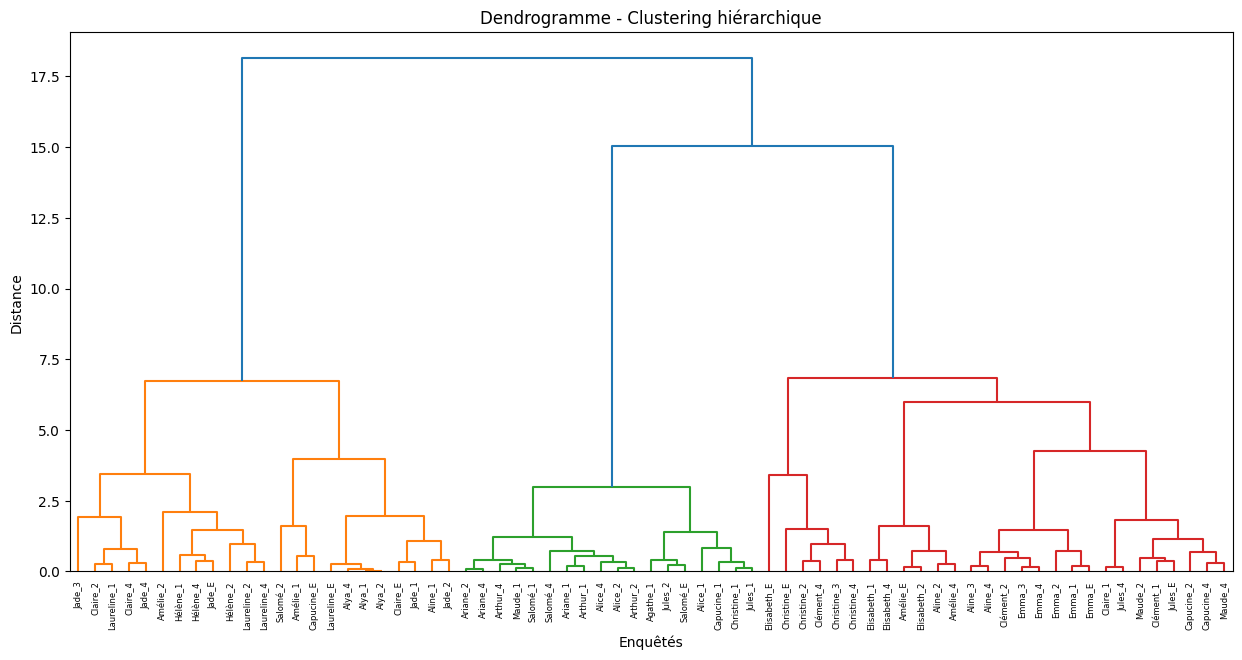

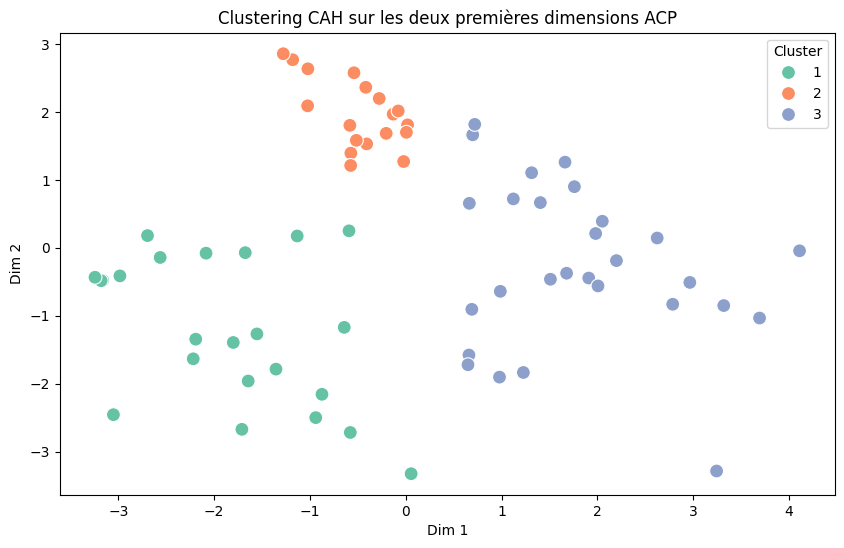

In [101]:
# Matrice de liaison
linked = linkage(X_pca_EN_PE, method='ward', metric='euclidean')  # 'ward' minimise la variance intra-cluster

# Dendrogramme
plt.figure(figsize=(15, 7))
dendrogram(linked, labels=pca_EN_PE.row_labels, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title("Dendrogramme - Clustering hiérarchique")
plt.xlabel("Enquêtés")
plt.ylabel("Distance")
plt.show()

# Découpage de l’arbre pour obtenir les clusters (ex. 3 clusters)
resPCA_EN_PE['Cluster_CAH'] = fcluster(linked, t=k, criterion='maxclust')

# Visualisation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=resPCA_EN_PE['Coord1'], y=resPCA_EN_PE['Coord2'], hue=resPCA_EN_PE['Cluster_CAH'], palette='Set2', s=100)
plt.title("Clustering CAH sur les deux premières dimensions ACP")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend(title='Cluster')
plt.show()

## Analyses

In [102]:
# Ajout des labels K-means et CAH dans df
df_EN_PE['Cluster_KM'] = labels_kmeans
df_EN_PE['Cluster_CAH'] = resPCA_EN_PE['Cluster_CAH'].values

In [103]:
# Afficher les moyennes des variables par cluster des K-Means
profil_clusters_KM_EN_PE = df_EN_PE.groupby('Cluster_KM').mean()
print("Profils moyens par cluster K-means :")
print(profil_clusters_KM_EN_PE.T)

Profils moyens par cluster K-means :
Cluster_KM                                              0            1  \
Longueur_Moyenne_Caracteres                   1186.659091  1121.354545   
Pourcentage_Posts_Avec_Annexes                   3.787879     1.363636   
Pourcentage_Posts_Contenant_Mentions_Total      26.060606    45.000000   
Pourcentage_Posts_Contenant_Mentions_Pairs       4.090909     5.606061   
Pourcentage_Posts_Contenant_Mentions_Auteurs     7.272727    13.181818   
Pourcentage_Posts_Contenant_Mentions_Maisons    12.424242    27.575758   
Nombre_de_Posts                                  8.590909     9.045455   
Pourcentage_Posts_Contenant_Hashtags_Total      92.575758    77.575758   
Plusieurs_Images                                12.727273    52.272727   
Personne                                         0.000000    14.242424   
PostProduction                                   4.848485    85.454545   
Mots                                             4.848485    84.090909   
N

In [104]:
# Afficher les moyennes des variables par cluster du CAH
profil_clusters_CAH_EN_PE = df_EN_PE.groupby('Cluster_CAH').mean()
print("Profils moyens par cluster CAH :")
print(profil_clusters_CAH_EN_PE.T)

Profils moyens par cluster CAH :
Cluster_CAH                                             1            2  \
Longueur_Moyenne_Caracteres                   1128.600000  1224.388889   
Pourcentage_Posts_Avec_Annexes                   2.753623     2.777778   
Pourcentage_Posts_Contenant_Mentions_Total      44.492754    19.444444   
Pourcentage_Posts_Contenant_Mentions_Pairs       5.362319     4.444444   
Pourcentage_Posts_Contenant_Mentions_Auteurs    12.608696     0.555556   
Pourcentage_Posts_Contenant_Mentions_Maisons    27.826087     8.333333   
Nombre_de_Posts                                  8.782609     9.111111   
Pourcentage_Posts_Contenant_Hashtags_Total      77.101449    95.000000   
Plusieurs_Images                                50.000000    15.555556   
Personne                                        13.623188     0.000000   
PostProduction                                  84.637681     1.666667   
Mots                                            83.333333     1.666667   
N_Ecr

In [105]:
# Afficher les individus avec leur cluster
df_EN_PE[['Cluster_KM']]

,Cluster_KM
Agathe_1,0
Alice_1,0
Alice_2,0
Alice_4,0
Aline_1,1
...,...
Maude_4,2
Salomé_1,0
Salomé_2,1
Salomé_4,0


In [106]:
# Vérifier la contingence des regroupements entre les deux méthodes :
contingence_EN_PE = pd.crosstab(df_EN_PE['Cluster_CAH'], df_EN_PE['Cluster_KM'],  margins = True)
contingence_EN_PE

Cluster_KM,0,1,2,All
Cluster_CAH,,,,
1,1,22,0,23
2,18,0,0,18
3,3,0,25,28
All,22,22,25,69


In [107]:
# Calcul du V de Cramér pour analyser cette contingence
chi2 = stats.chi2_contingency(contingence_EN_PE)[0]
n = contingence_EN_PE.sum().sum()
phi2 = chi2 / n
r, k = contingence_EN_PE.shape
phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
rcorr = r - ((r - 1)**2) / (n - 1)
kcorr = k - ((k - 1)**2) / (n - 1)
cramers_v = np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))
print(f"V de Cramér : {cramers_v:.3f}")

V de Cramér : 0.362


In [108]:
# Afficher les individus avec leur cluster
ind_clust = df_EN_PE[df_EN_PE['Cluster_KM'] == 2].index.tolist()
ind_clust

['Aline_2',
 'Aline_3',
 'Aline_4',
 'Amélie_4',
 'Amélie_E',
 'Capucine_4',
 'Christine_2',
 'Christine_3',
 'Christine_4',
 'Christine_E',
 'Clément_1',
 'Clément_2',
 'Clément_4',
 'Elisabeth_1',
 'Elisabeth_2',
 'Elisabeth_4',
 'Elisabeth_E',
 'Emma_1',
 'Emma_2',
 'Emma_3',
 'Emma_4',
 'Emma_E',
 'Jules_E',
 'Maude_2',
 'Maude_4']

In [109]:
donnees_clusters_clusters = []

for identifiant, row in df_EN_PE.iterrows():
    match = re.match(r'^(.+?)_(.+)$', identifiant)
    if not match:
        continue
    nom, etape = match.groups()
    cluster = row.get('Cluster_CAH', None)  # ou 'Cluster', selon ta colonne
    donnees_clusters.append((nom, etape, cluster))

df_clusters = pd.DataFrame(donnees_clusters, columns=['Nom', 'Etape', 'Cluster_CAH'])

evolution_clusters = df_clusters.pivot_table(index='Nom', columns='Etape', values='Cluster_CAH', aggfunc='first')

def sort_key(val):
    try:
        return int(val)
    except ValueError:
        return float('inf')

evolution_clusters = evolution_clusters.reindex(sorted(evolution_clusters.columns, key=sort_key), axis=1)

print(evolution_clusters)

Etape        1    2    3    4    E
Nom                               
Agathe     2.0  NaN  NaN  NaN  NaN
Alice      2.0  2.0  NaN  2.0  NaN
Aline      1.0  3.0  3.0  3.0  NaN
Alya       1.0  1.0  NaN  1.0  NaN
Amélie     1.0  1.0  NaN  3.0  3.0
Ariane     2.0  2.0  NaN  2.0  NaN
Arthur     2.0  2.0  NaN  2.0  NaN
Capucine   2.0  3.0  NaN  3.0  1.0
Christine  2.0  3.0  3.0  3.0  3.0
Claire     3.0  1.0  NaN  1.0  1.0
Clément    3.0  3.0  NaN  3.0  NaN
Elisabeth  3.0  3.0  NaN  3.0  3.0
Emma       3.0  3.0  3.0  3.0  3.0
Hélène     1.0  1.0  NaN  1.0  NaN
Jade       1.0  1.0  1.0  1.0  1.0
Jules      2.0  2.0  NaN  3.0  3.0
Laureline  1.0  1.0  NaN  1.0  1.0
Maude      2.0  3.0  NaN  3.0  NaN
Salomé     2.0  1.0  NaN  2.0  2.0
